## 기초 통계 실습

In [1]:
import pandas as pd # pandas package
import numpy as np # numpy package

In [2]:
data = pd.DataFrame({
    "score1" : [99, 65, 79, 94, 87],
    "score2" :[79, 85, 79, 93, 97],
    "score3" : [59, np.nan, 39, np.nan, np.nan],
    "weight" : [5.43, 0.12, 10.44, 9.33, 4.22],
    "diff" : [-2.1, 5, 2, -5.4, -3.3],
    "place" : ["A", "B", "A", "A","B"]
})
data

,score1,score2,score3,weight,diff,place
0,99,79,59.0,5.43,-2.1,A
1,65,85,NaN,0.12,5.0,B
2,79,79,39.0,10.44,2.0,A
3,94,93,NaN,9.33,-5.4,A
4,87,97,NaN,4.22,-3.3,B


### pandas 함수를 이용한 요약 정보

In [3]:
# data 데이터 프레임의 요약정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score1  5 non-null      int64  
 1   score2  5 non-null      int64  
 2   score3  2 non-null      float64
 3   weight  5 non-null      float64
 4   diff    5 non-null      float64
 5   place   5 non-null      object 
dtypes: float64(3), int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
# 수치형 변수의 기술 통계 정보 확인
data.describe()

,score1,score2,score3,weight,diff
count,5.00000,5.000000,2.000000,5.000000,5.000000
mean,84.80000,86.600000,49.000000,5.908000,-0.760000
std,13.38656,8.173127,14.142136,4.148128,4.200357
min,65.00000,79.000000,39.000000,0.120000,-5.400000
25%,79.00000,79.000000,44.000000,4.220000,-3.300000
50%,87.00000,85.000000,49.000000,5.430000,-2.100000
75%,94.00000,93.000000,54.000000,9.330000,2.000000
max,99.00000,97.000000,59.000000,10.440000,5.000000


In [5]:
# 범주형 변수의 기술 통계 정보 확인, object type
data.describe(include = 'object')

,place
count,5
unique,2
top,A
freq,3


### 중심경향지

In [6]:
# 한 변수의 평균
print("한 변수: ", data['score1'].mean())

# 데이터 프레임 전체 평균
print("전체 : ")
print(data.mean())

# 절사평균
from scipy.stats import trim_mean
print(trim_mean(data['score2'], 0.1)) # 상하단의 0.1%를 제거한 평균값

# 가중평균
import numpy as np
np.average(data['score2'], weights = data['weight'])

한 변수:  84.8
전체 : 
score1    84.800
score2    86.600
score3    49.000
weight     5.908
diff      -0.760
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_7512\2270720248.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.mean())


86.6


86.01760324983074

In [7]:
# 중앙값
## 데이터 개수 : 홀수
print(data['score2'].median())

## 데이터 개수 : 짝수
x = [100, 600, 100, 200, 400, 500]
print(np.median(x))

85.0
300.0


In [8]:
# 최빈값
data['score2'].mode()

0    79
Name: score2, dtype: int64

### 산포도

In [9]:
# 범위
data['score2'].max() - data['score2'].min()

18

In [10]:
# 분산
print(data['score2'].var())
#표준편차
print(data['score2'].std())

66.8
8.17312669668102


In [11]:
# 사분위수 범위
print(data['score2'].quantile(0.75) - data['score2'].quantile(0.25))

14.0


In [12]:
# 변동 계수
cv1 = data['score1'].std() / data['score1'].mean()
cv2 = data['score2'].std()/ data['score2'].mean()

print('score1의 CV계수 : {}'.format(np.round(cv1, 3)))
print('score2의 CV계수 : {}'.format(np.round(cv2, 3)))

score1의 CV계수 : 0.158
score2의 CV계수 : 0.094


### 비대칭도
- skew() : 왜도
- kurtosis() : 첨도

In [13]:
# 시각화 패키지
%matplotlib inline
import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning) # FutureWarning 제거
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
import seaborn as sns

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os 
if os.name == 'nt' : # Window OS
    font_family = "Malgun Gothic"
else: # MAC OS
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [14]:
# 왜도 산출
from scipy.stats import skew

skew_list1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4, 5]
skew_list2 = [1, 2, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6]

print(skew(skew_list1))
print(skew(skew_list2))

1.6656293067949786
-1.0422210554570965


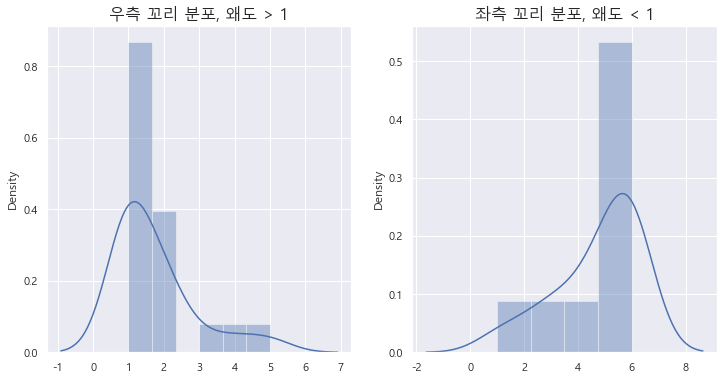

In [15]:
# 왜도 시각화
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
dis_plot = sns.distplot(skew_list1)
plt.title('우측 꼬리 분포, 왜도 > 1', fontsize = 16)

plt.subplot(1, 2, 2)
dis_plot = sns.distplot(skew_list2)
plt.title('좌측 꼬리 분포, 왜도 < 1', fontsize = 16)
plt.show()

In [16]:
# 첨도 산출
from scipy.stats import kurtosis

kur_list1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
kur_list2 = [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5,
            5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
            5, 6, 7, 8, 9, 10]

print(kurtosis(kur_list1))
print(kurtosis(kur_list2))

-1.2242424242424244
2.5346043070418833


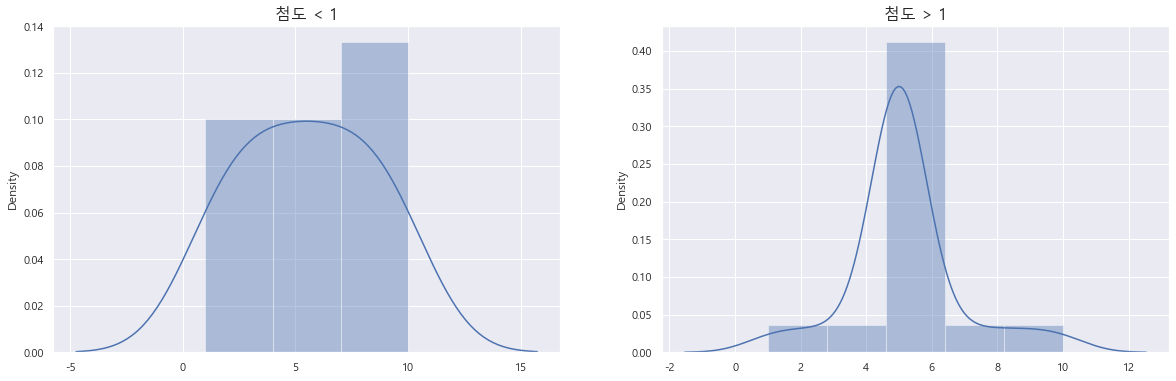

In [17]:
# 첨도 시각화
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
dis_plot = sns.distplot(kur_list1)
plt.title('첨도 < 1', fontsize = 16)

plt.subplot(1, 2, 2)
dis_plot = sns.distplot(kur_list2)
plt.title('첨도 > 1', fontsize = 16)
plt.show()